In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
#origin_rThz = np.array({2.6220084679273516, 2.0175472867126008, 0.4999999999986200});
#dest_rThz = np.array({73.7249693813762264, 1.3969918345852945, 71.5342561928560059});

In [4]:
# Function to compute barycentric coordinates
def barycentric_coords(P, A, B, C):
    v0 = B - A
    v1 = C - A
    v2 = P - A
    d00 = np.dot(v0, v0)
    d01 = np.dot(v0, v1)
    d11 = np.dot(v1, v1)
    d20 = np.dot(v2, v0)
    d21 = np.dot(v2, v1)
    denom = d00 * d11 - d01 * d01
    v = (d11 * d20 - d01 * d21) / denom
    w = (d00 * d21 - d01 * d20) / denom
    u = 1.0 - v - w
    return u, v, w

In [5]:

# Define vertices of the triangle (A, B, C)
A = np.array([0.2, 0.2])
B = np.array([0.8, 0.2])
C = np.array([0.5, 0.7])

In [13]:
# Create a grid of points within the square domain
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

# Initialize arrays to hold barycentric coordinates
U = np.zeros_like(X)
V = np.zeros_like(X)
W = np.zeros_like(X)

# Calculate barycentric coordinates for each point in the grid
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        P = np.array([X[i, j], Y[i, j]])
        U[i, j], V[i, j], W[i, j] = barycentric_coords(P, A, B, C)



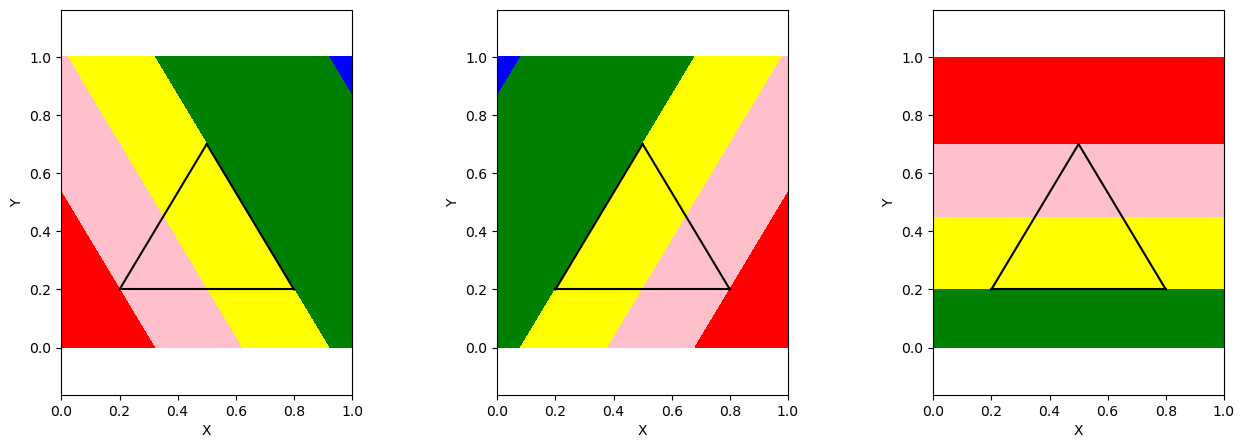

In [29]:
# define color levels for contourf for intervals -inf, -1, 0, 1, inf
levels = [-np.inf, -1, 0,0.5, 1, np.inf]

# plot each barycentric coordinate as contour plot
fig = plt.figure()
# size of the figure
fig.set_size_inches(15, 5)
fig.subplots_adjust(wspace=0.5)
ax = fig.add_subplot(131)
colors = ['blue', 'green', 'yellow','pink', 'red']
ax.contourf(X, Y, U, levels, colors=colors)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.axis('equal')
# plot the triangle
ax.plot([A[0], B[0]], [A[1], B[1]], 'k-')
ax.plot([B[0], C[0]], [B[1], C[1]], 'k-')
ax.plot([C[0], A[0]], [C[1], A[1]], 'k-')

ax = fig.add_subplot(132)
ax.contourf(X, Y, V, levels, colors=colors)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.axis('equal')
# plot the triangle
ax.plot([A[0], B[0]], [A[1], B[1]], 'k-')
ax.plot([B[0], C[0]], [B[1], C[1]], 'k-')
ax.plot([C[0], A[0]], [C[1], A[1]], 'k-')

ax = fig.add_subplot(133)
ax.contourf(X, Y, W, levels, colors=colors)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.axis('equal')
# plot the triangle
ax.plot([A[0], B[0]], [A[1], B[1]], 'k-')
ax.plot([B[0], C[0]], [B[1], C[1]], 'k-')
ax.plot([C[0], A[0]], [C[1], A[1]], 'k-')
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def barycentric_basis(verts):
    basis = np.empty((3,3))
    basis[0,:] = verts[:,0]
    basis[1,:] = verts[:,1]
    basis[2,:] = 1
    return basis

def compute_barycentric(verts, point):
    assert(type(point) == np.ndarray)
    assert(type(verts) == np.ndarray)
    basis = barycentric_basis(verts)
    rhs = np.array((point[0], point[1], 1))

    parametric = np.linalg.solve(basis, rhs)
    return parametric

def barycentric_to_real(verts, barycentric_coords):
    basis = barycentric_basis(verts)
    real = basis@barycentric_coords
    return real

def edge_intersection(verts, ray, edge=0):
    b1 = compute_barycentric(verts, ray[0,:])
    b2 = compute_barycentric(verts, ray[1,:])
    vector = b2-b1
    u = b1[edge]/(b1[edge]-b2[edge])
    ray_intersect = u*vector+b1
    start_vertex = [1, 2, 0]
    s = (ray_intersect[start_vertex[edge]]-1)/-1
    return s, u, ray_intersect

(-4.440892098500626e-16, -0.6666666666666669, array([ 0.00000000e+00,  1.00000000e+00, -2.77555756e-17]))
(0.7777777777777778, 0.07407407407407407, array([0.77777778, 0.        , 0.22222222]))


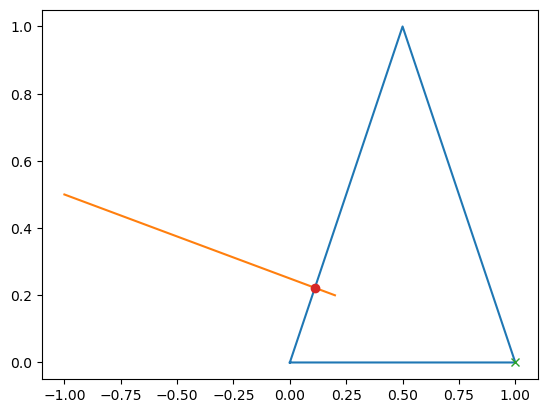

In [3]:




triangle1 = np.array(((0,0),(1,0), (0.5,1)))
ray = np.array(((0.2,0.2), (-1,0.5)))

triangle_closed = np.empty((triangle1.shape[0]+1, triangle1.shape[1]))
triangle_closed[:-1, :] = triangle1
triangle_closed[-1,:] = triangle1[0,:]
plt.plot(triangle_closed[:,0], triangle_closed[:,1])
plt.plot(ray[:,0], ray[:,1])

intersection0 = edge_intersection(triangle1, ray , 0)
intersection1 = edge_intersection(triangle1, ray, 1)
print(intersection0)
print(intersection1)
real0 = barycentric_to_real(triangle1, intersection0[-1])
real1 = barycentric_to_real(triangle1, intersection1[-1])
plt.plot(real0[0], real0[1], marker="x")
plt.plot(real1[0], real1[1], marker="o")


plt.show()


(0.3610123828509346, 0.9996810382030875, array([0.63898762, 0.36101238, 0.        ]))


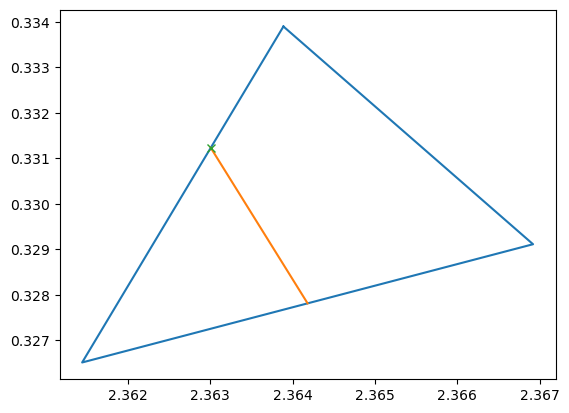

In [14]:
el10627 = np.array(((2.3638890457070847, 0.3339009278951910), (2.3614440013667641, 0.3265147585787270), (2.3669213202267083, 0.3291142310482917)))
ray = np.array(((el10627[1]+el10627[2])/2, (2.3630059791071032, 0.3312355204866098)))

triangle_closed = np.empty((el10627.shape[0]+1, el10627.shape[1]))
triangle_closed[:-1, :] = el10627
triangle_closed[-1,:] = el10627[0,:]
plt.plot(triangle_closed[:,0], triangle_closed[:,1])
plt.plot(ray[:,0], ray[:,1])

intersection0 = edge_intersection(el10627, ray , 2)
print(intersection0)
real0 = barycentric_to_real(el10627, intersection0[-1])
plt.plot(real0[0], real0[1], marker="x")


plt.show()

In [11]:
barycentric_to_real(triangle2, np.array((0,0,1)))

array([5., 6., 1.])